<a href="https://colab.research.google.com/github/Charlestonjm21/Machine-Learning-Projects/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification - My First Machine Learning Project! 🌸

**Project Goal:** Build a machine learning model to classify iris flowers into three species based on their physical measurements.

**The Three Species:**
- **Setosa** - Usually has smaller petals
- **Versicolor** - Medium-sized flowers
- **Virginica** - Typically has larger petals

**What I will Learn:**
- Loading built-in datasets
- Exploratory Data Analysis (EDA)
- Data visualization techniques
- Training multiple classification models
- Model evaluation and comparison
- Making predictions on new data

**Dataset Info:**
- 150 samples (50 of each species)
- 4 features: sepal length, sepal width, petal length, petal width
- No missing values (perfect for beginners!)

---

## Step 1: Import Required Libraries

We'll import all the tools we need for data analysis and machine learning.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# For decision tree visualization
from sklearn.tree import plot_tree

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("✅ All libraries imported successfully!")
print("🎯 Ready to start your first ML project!")

✅ All libraries imported successfully!
🎯 Ready to start your first ML project!


## Step 2: Load the Iris Dataset

The Iris dataset is built into scikit-learn, so we don't need to download anything!

In [2]:
# Load the iris dataset
iris = load_iris()

# Create a DataFrame for easier manipulation
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Display first few rows
print("📊 First 10 rows of the Iris dataset:\n")
print(df.head(10))

print("\n" + "="*70)
print("\n📈 Dataset Overview:")
print(f"Total samples: {len(df)}")
print(f"Number of features: {len(iris.feature_names)}")
print(f"Number of classes: {len(iris.target_names)}")
print(f"\nFeatures: {iris.feature_names}")
print(f"Classes: {list(iris.target_names)}")

print("\n" + "="*70)
print("\n🔍 Class Distribution:")
print(df['species_name'].value_counts())
print("\n✅ Dataset is perfectly balanced! (50 samples per class)")

📊 First 10 rows of the Iris dataset:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   species species_name  
0        0       Setosa  
1        0       Setosa  
2        0    

## Step 3: Data Exploration & Statistics

Let's understand the data through summary statistics.

In [3]:
# Basic information about the dataset
print("📋 Dataset Information:")
print(df.info())

print("\n" + "="*70)
print("\n📊 Statistical Summary:")
print(df.describe())

print("\n" + "="*70)
print("\n🔍 Check for Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values! This dataset is clean and ready to use.")
else:
    print(missing)

print("\n" + "="*70)
print("\n📊 Statistics by Species:\n")
print(df.groupby('species_name').mean())

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


📊 Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%    

## Step 4: Data Visualization - Understanding the Patterns

Visualizations help us understand how different features relate to species.

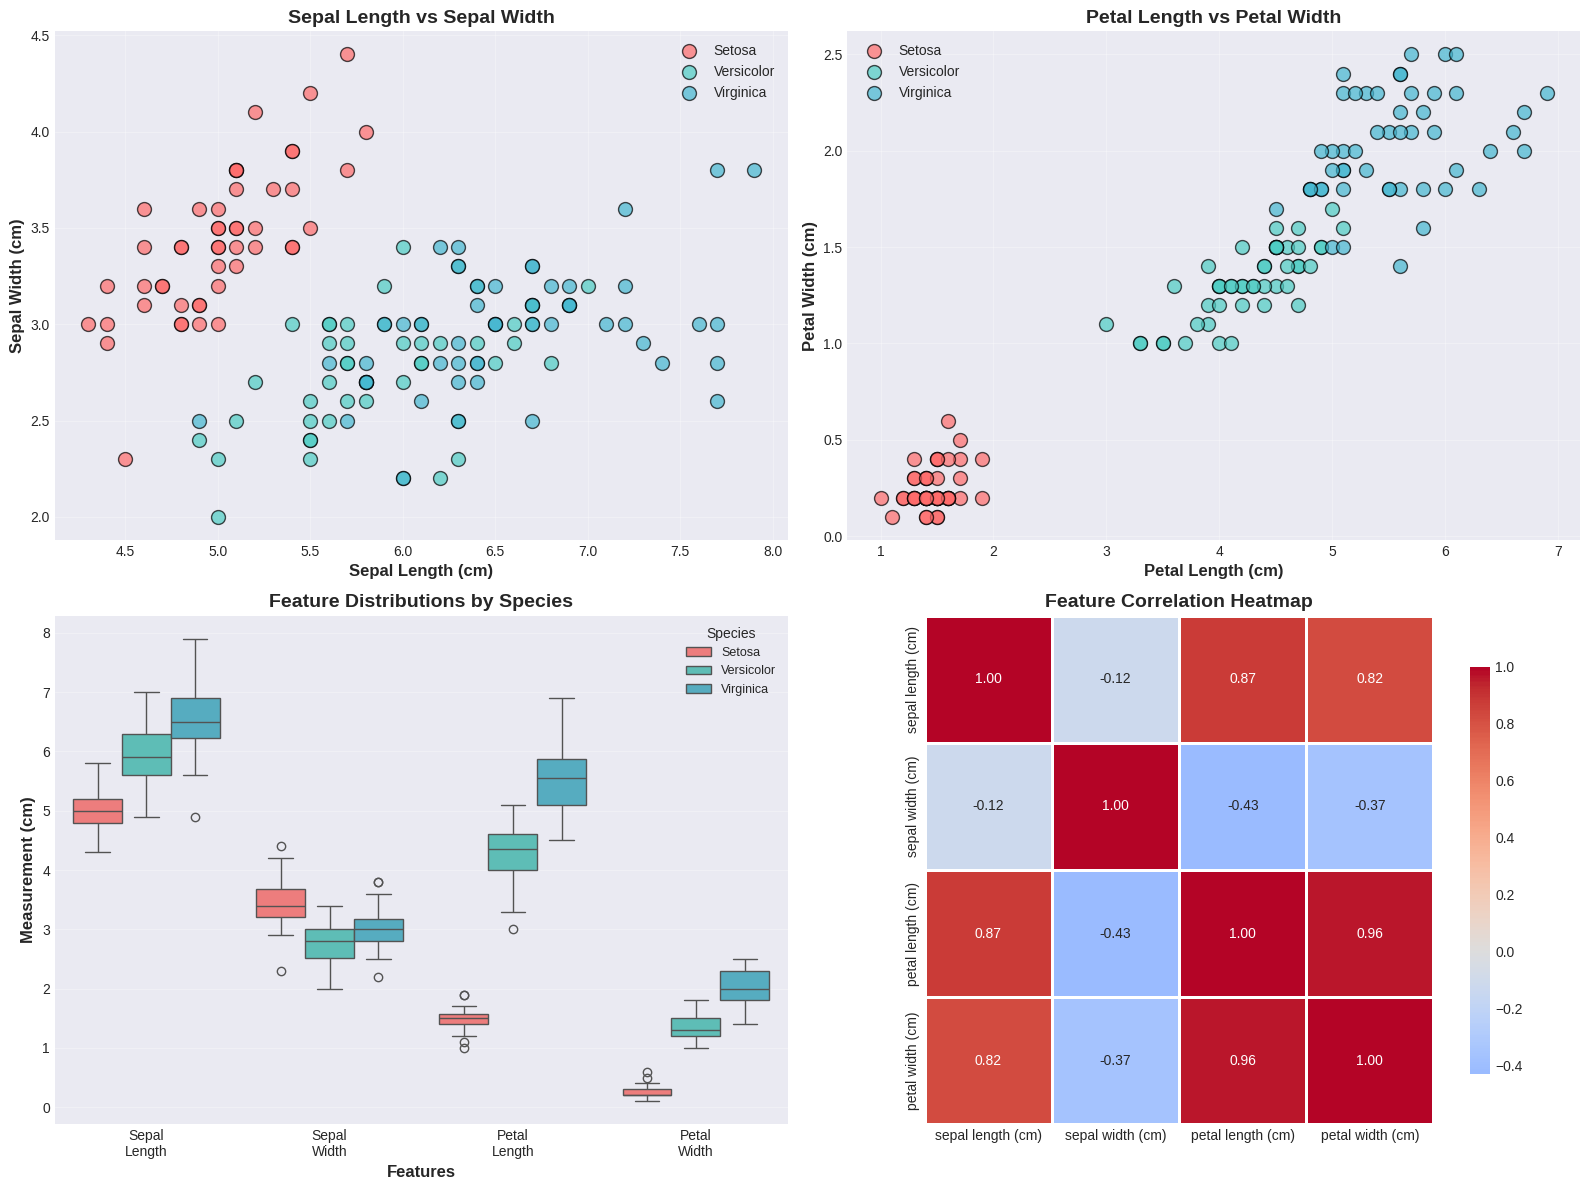


💡 Key Observations:
1. Setosa is clearly separable from the other two species (especially by petal measurements)
2. Versicolor and Virginica have some overlap, making them harder to distinguish
3. Petal length and petal width are highly correlated (0.96)
4. Petal measurements are generally more discriminative than sepal measurements


In [4]:
# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Define colors for each species
colors = {'Setosa': '#FF6B6B', 'Versicolor': '#4ECDC4', 'Virginica': '#45B7D1'}

# Plot 1: Sepal Length vs Sepal Width
for species in df['species_name'].unique():
    data = df[df['species_name'] == species]
    axes[0, 0].scatter(data['sepal length (cm)'], data['sepal width (cm)'],
                      label=species, alpha=0.7, s=100, color=colors[species], edgecolor='black')
axes[0, 0].set_xlabel('Sepal Length (cm)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Sepal Width (cm)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Sepal Length vs Sepal Width', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Petal Length vs Petal Width
for species in df['species_name'].unique():
    data = df[df['species_name'] == species]
    axes[0, 1].scatter(data['petal length (cm)'], data['petal width (cm)'],
                      label=species, alpha=0.7, s=100, color=colors[species], edgecolor='black')
axes[0, 1].set_xlabel('Petal Length (cm)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Petal Width (cm)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Petal Length vs Petal Width', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Box plots for all features
df_melted = df.melt(id_vars='species_name', value_vars=iris.feature_names)
sns.boxplot(data=df_melted, x='variable', y='value', hue='species_name', ax=axes[1, 0], palette=colors)
axes[1, 0].set_xlabel('Features', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Measurement (cm)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Feature Distributions by Species', fontsize=14, fontweight='bold')
axes[1, 0].set_xticklabels(['Sepal\nLength', 'Sepal\nWidth', 'Petal\nLength', 'Petal\nWidth'])
axes[1, 0].legend(title='Species', fontsize=9)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Correlation Heatmap
correlation = df[iris.feature_names].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Key Observations:")
print("1. Setosa is clearly separable from the other two species (especially by petal measurements)")
print("2. Versicolor and Virginica have some overlap, making them harder to distinguish")
print("3. Petal length and petal width are highly correlated (0.96)")
print("4. Petal measurements are generally more discriminative than sepal measurements")

## Step 5: Advanced Visualizations - Pair Plot

A pair plot shows relationships between all feature pairs at once.

<Figure size 1200x1000 with 0 Axes>

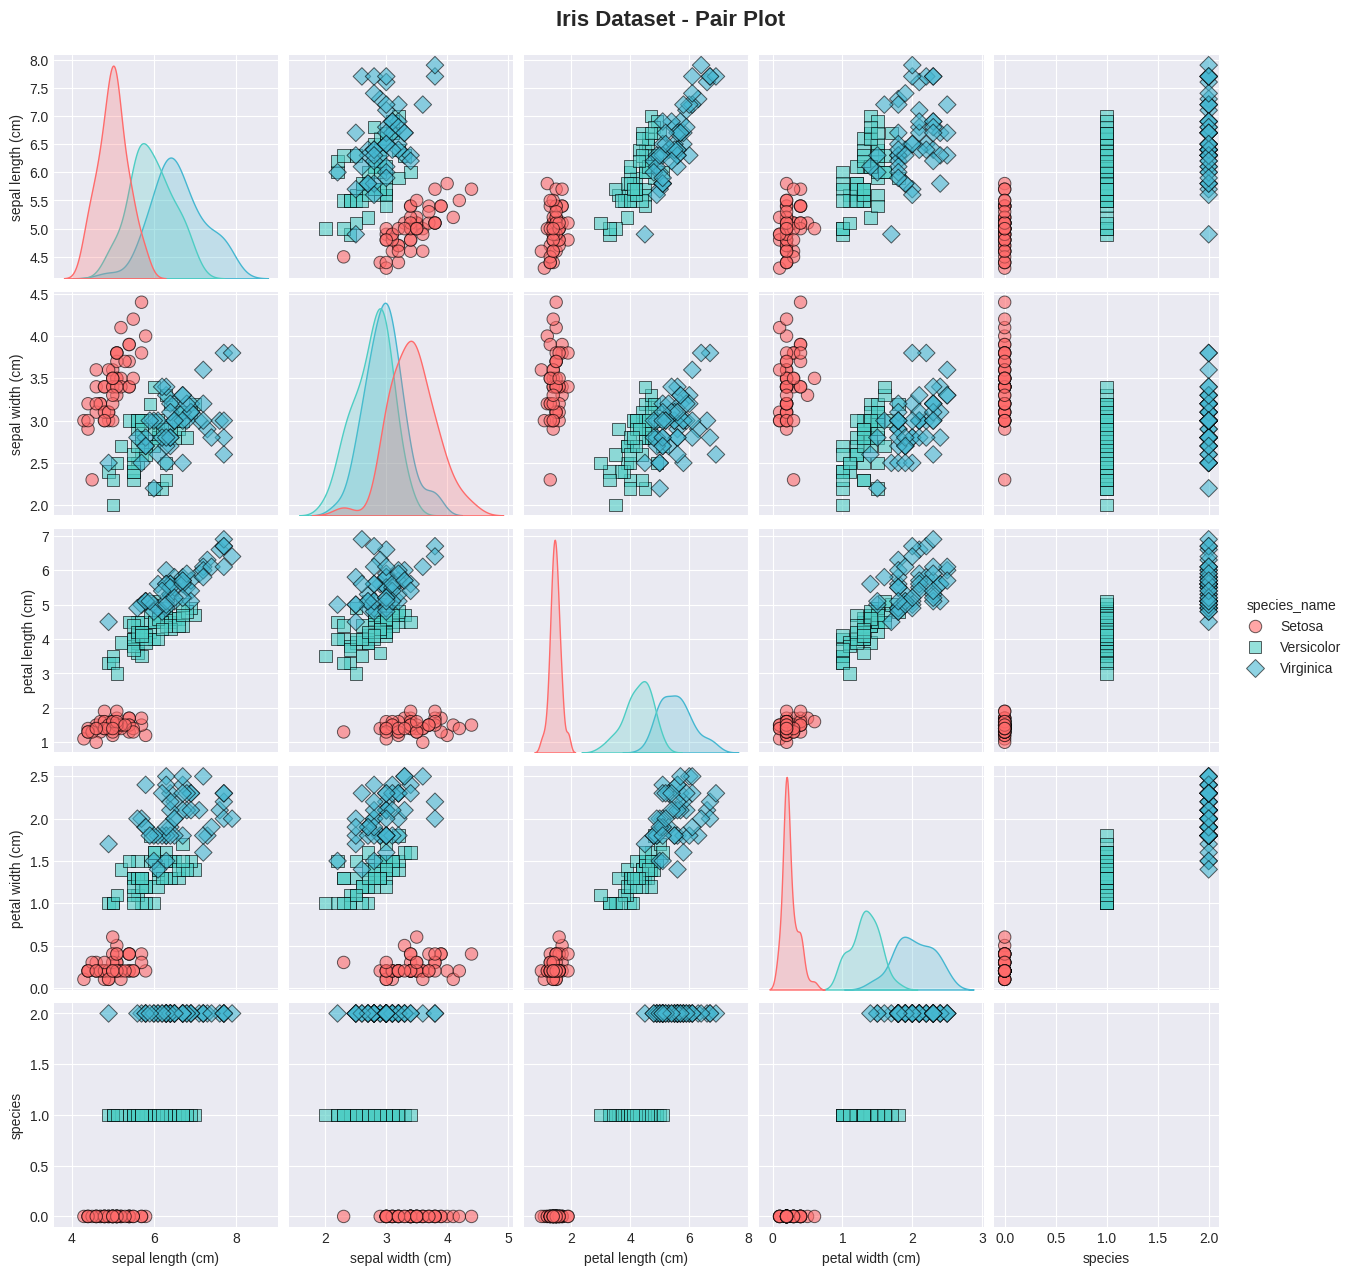


🔍 What to look for in the pair plot:
• Diagonal: Distribution of each feature (density plots)
• Off-diagonal: Relationships between feature pairs
• Look for clear separation between species - that's what makes classification possible!


In [5]:
# Create a pair plot
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(df, hue='species_name', palette=colors,
                         diag_kind='kde', markers=['o', 's', 'D'],
                         plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'black'},
                         height=2.5)
pair_plot.fig.suptitle('Iris Dataset - Pair Plot', y=1.02, fontsize=16, fontweight='bold')
plt.show()

print("\n🔍 What to look for in the pair plot:")
print("• Diagonal: Distribution of each feature (density plots)")
print("• Off-diagonal: Relationships between feature pairs")
print("• Look for clear separation between species - that's what makes classification possible!")

## Step 6: Prepare Data for Machine Learning

Split the data into training and testing sets.

In [6]:
# Separate features (X) and target (y)
X = df[iris.feature_names]
y = df['species']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("📊 Data Split Summary:")
print("="*70)
print(f"Training set: {len(X_train)} samples ({(len(X_train)/len(X))*100:.0f}%)")
print(f"Test set: {len(X_test)} samples ({(len(X_test)/len(X))*100:.0f}%)")

print("\nTraining set class distribution:")
print(y_train.value_counts().sort_index())

print("\nTest set class distribution:")
print(y_test.value_counts().sort_index())

# Feature Scaling (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Data prepared and scaled successfully!")
print("\n💡 Why scaling?")
print("Some algorithms (like SVM and KNN) are sensitive to feature scales.")
print("Scaling ensures all features contribute equally to the model.")

📊 Data Split Summary:
Training set: 120 samples (80%)
Test set: 30 samples (20%)

Training set class distribution:
species
0    40
1    40
2    40
Name: count, dtype: int64

Test set class distribution:
species
0    10
1    10
2    10
Name: count, dtype: int64

✅ Data prepared and scaled successfully!

💡 Why scaling?
Some algorithms (like SVM and KNN) are sensitive to feature scales.
Scaling ensures all features contribute equally to the model.


## Step 7: Train Multiple Machine Learning Models

We'll train 6 different models and compare their performance!

In [7]:
# Dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42),
    'Naive Bayes': GaussianNB()
}

# Train all models and store results
results = []
trained_models = {}

print("🤖 Training 6 different machine learning models...\n")
print("="*70)

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Use scaled data for models that need it
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Cross-validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_mean,
        'CV Std': cv_std
    })

    trained_models[name] = model

    print(f"✅ {name} trained!")
    print(f"   Accuracy: {accuracy:.4f} | CV Score: {cv_mean:.4f} (+/- {cv_std:.4f})")

print("\n" + "="*70)
print("\n🎉 All models trained successfully!")

🤖 Training 6 different machine learning models...


Training Logistic Regression...
✅ Logistic Regression trained!
   Accuracy: 0.9333 | CV Score: 0.9583 (+/- 0.0264)

Training Decision Tree...
✅ Decision Tree trained!
   Accuracy: 0.9333 | CV Score: 0.9417 (+/- 0.0204)

Training Random Forest...
✅ Random Forest trained!
   Accuracy: 0.9000 | CV Score: 0.9500 (+/- 0.0167)

Training K-Nearest Neighbors...
✅ K-Nearest Neighbors trained!
   Accuracy: 0.9333 | CV Score: 0.9667 (+/- 0.0312)

Training Support Vector Machine...
✅ Support Vector Machine trained!
   Accuracy: 0.9667 | CV Score: 0.9667 (+/- 0.0312)

Training Naive Bayes...
✅ Naive Bayes trained!
   Accuracy: 0.9667 | CV Score: 0.9583 (+/- 0.0264)


🎉 All models trained successfully!


## Step 8: Compare Model Performance

Let's see which model performs best!


📊 MODEL PERFORMANCE COMPARISON
                 Model  Accuracy  Precision   Recall  F1-Score  CV Mean   CV Std
Support Vector Machine  0.966667   0.969697 0.966667  0.966583 0.966667 0.031180
           Naive Bayes  0.966667   0.969697 0.966667  0.966583 0.958333 0.026352
         Decision Tree  0.933333   0.933333 0.933333  0.933333 0.941667 0.020412
   Logistic Regression  0.933333   0.933333 0.933333  0.933333 0.958333 0.026352
   K-Nearest Neighbors  0.933333   0.944444 0.933333  0.932660 0.966667 0.031180
         Random Forest  0.900000   0.902357 0.900000  0.899749 0.950000 0.016667


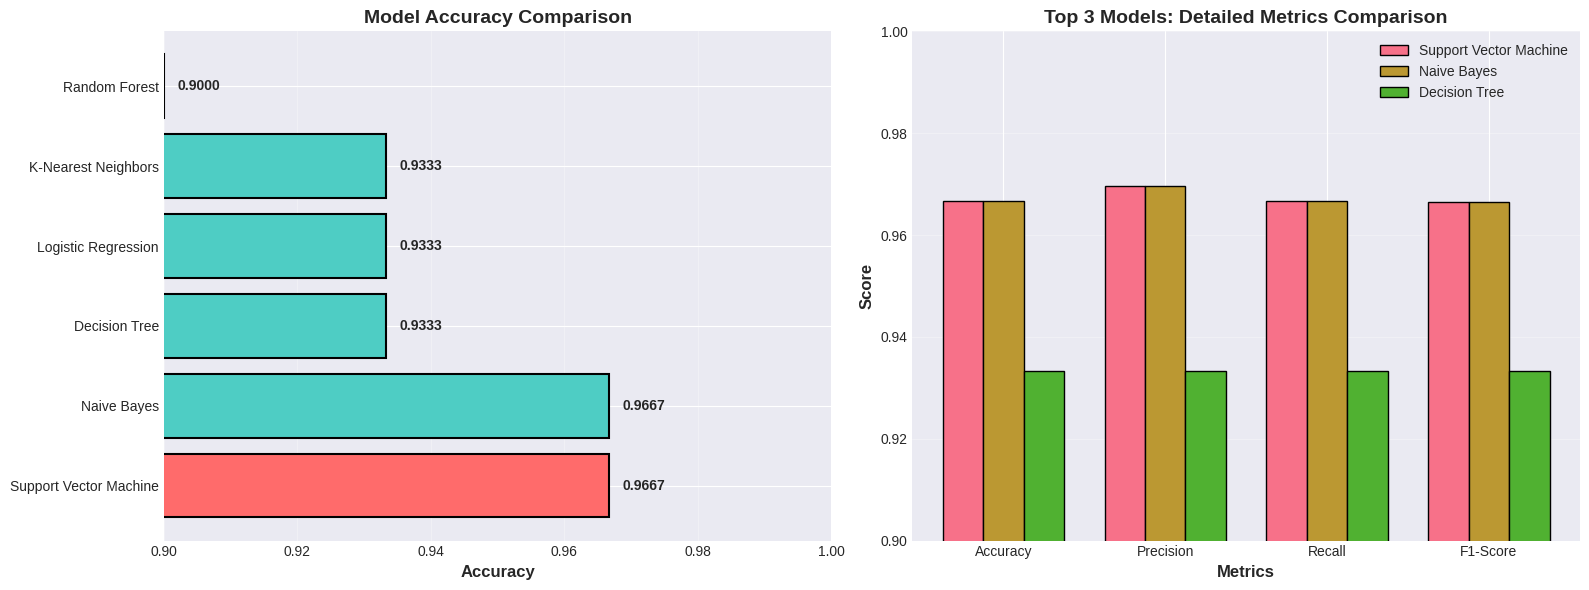


🏆 WINNER: Support Vector Machine
   Accuracy: 0.9667 (96.67%)

💡 All models performed excellently! This shows that the Iris dataset
   has clear patterns that make it easy for ML algorithms to learn.


In [8]:
# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("\n📊 MODEL PERFORMANCE COMPARISON")
print("="*100)
print(results_df.to_string(index=False))
print("="*100)

# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Accuracy comparison
colors_bar = ['#FF6B6B' if i == 0 else '#4ECDC4' for i in range(len(results_df))]
bars = axes[0].barh(results_df['Model'], results_df['Accuracy'], color=colors_bar, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlim([0.9, 1.0])
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0].text(width + 0.002, bar.get_y() + bar.get_height()/2,
                f'{width:.4f}', ha='left', va='center', fontweight='bold', fontsize=10)

# Plot 2: All metrics comparison for top 3 models
top_3_models = results_df.head(3)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.25

for i, (idx, row) in enumerate(top_3_models.iterrows()):
    values = [row[metric] for metric in metrics]
    axes[1].bar(x + i*width, values, width, label=row['Model'], edgecolor='black', linewidth=1)

axes[1].set_xlabel('Metrics', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[1].set_title('Top 3 Models: Detailed Metrics Comparison', fontsize=14, fontweight='bold')
axes[1].set_xticks(x + width)
axes[1].set_xticklabels(metrics)
axes[1].set_ylim([0.9, 1.0])
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Identify best model
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']

print(f"\n🏆 WINNER: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"\n💡 All models performed excellently! This shows that the Iris dataset")
print(f"   has clear patterns that make it easy for ML algorithms to learn.")

## Step 9: Detailed Analysis of Best Model

Let's dive deep into the best performing model.

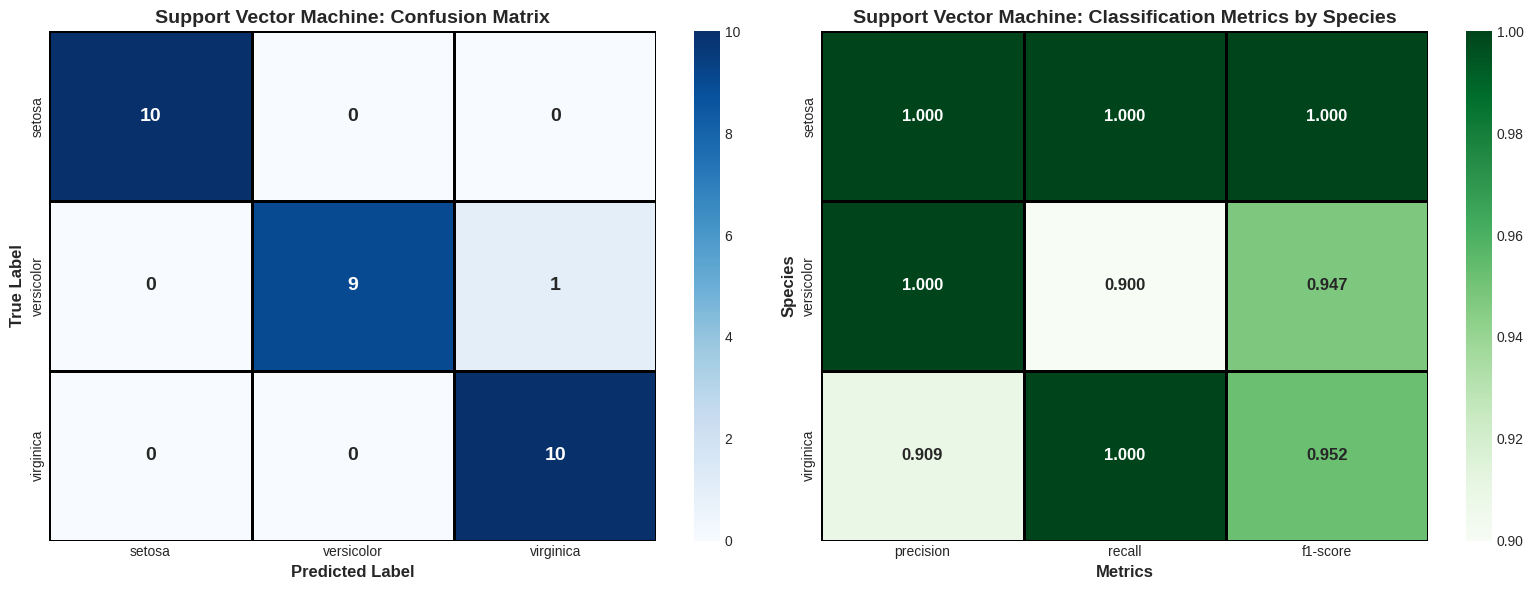


📋 DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


💡 How to read the confusion matrix:
• Diagonal values (top-left to bottom-right) = Correct predictions
• Off-diagonal values = Misclassifications
• Perfect model would have all values on the diagonal

💡 Metrics explained:
• Precision: Of all predicted X, how many were actually X?
• Recall: Of all actual X, how many did we predict correctly?
• F1-Score: Harmonic mean of precision and recall
• Support: Number of samples in each class


In [9]:
# Get the best model
best_model = trained_models[best_model_name]

# Make predictions
if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
    y_pred = best_model.predict(X_test_scaled)
else:
    y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=iris.target_names, yticklabels=iris.target_names,
            ax=axes[0], linewidths=2, linecolor='black',
            annot_kws={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].set_title(f'{best_model_name}: Confusion Matrix', fontsize=14, fontweight='bold')

# Plot 2: Classification Report Heatmap
report = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose().iloc[:-3, :-1]
sns.heatmap(report_df, annot=True, fmt='.3f', cmap='Greens', cbar=True,
            ax=axes[1], linewidths=2, linecolor='black',
            annot_kws={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title(f'{best_model_name}: Classification Metrics by Species', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Metrics', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Species', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed classification report
print("\n📋 DETAILED CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\n💡 How to read the confusion matrix:")
print("• Diagonal values (top-left to bottom-right) = Correct predictions")
print("• Off-diagonal values = Misclassifications")
print("• Perfect model would have all values on the diagonal")

print("\n💡 Metrics explained:")
print("• Precision: Of all predicted X, how many were actually X?")
print("• Recall: Of all actual X, how many did we predict correctly?")
print("• F1-Score: Harmonic mean of precision and recall")
print("• Support: Number of samples in each class")

## Step 10: Visualize Decision Boundaries (2D)

Let's see how the model separates different species using two features.

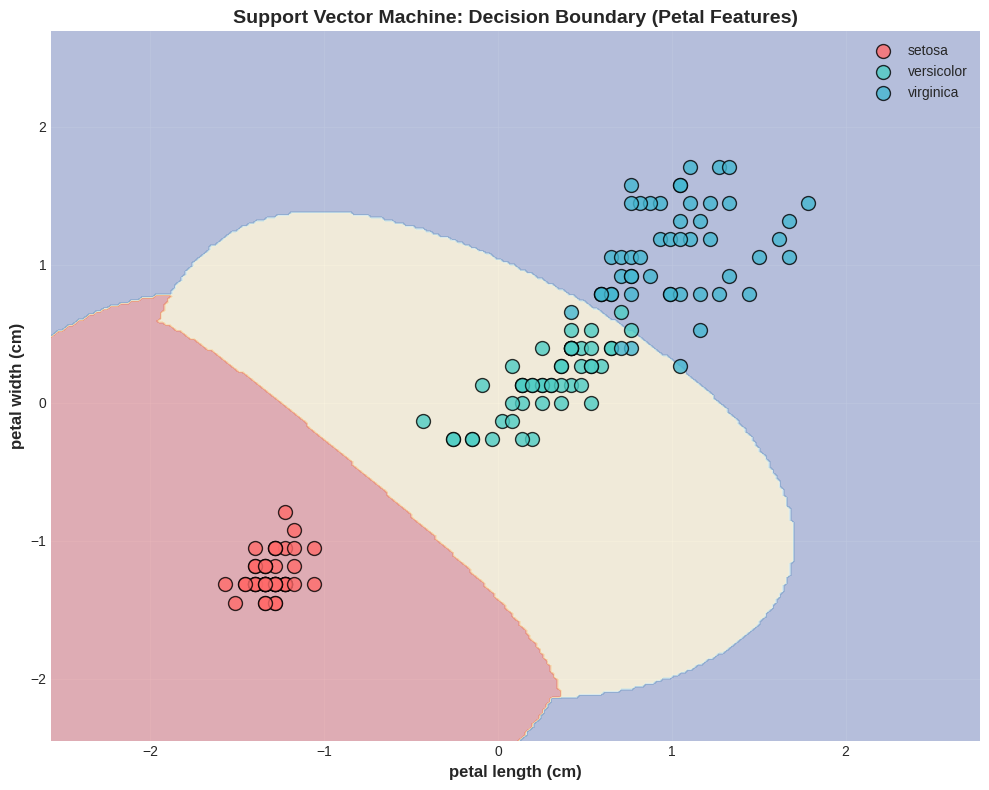


💡 The colored regions show where the model predicts each species.
   Notice how well-separated the species are!


In [10]:
# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, feature_x, feature_y, title, use_scaled=False):
    # Get feature indices
    feature_names = list(iris.feature_names)
    idx_x = feature_names.index(feature_x)
    idx_y = feature_names.index(feature_y)

    # Use only two features
    X_2d = X[:, [idx_x, idx_y]]

    # Train a new model with just these two features
    if use_scaled:
        scaler_2d = StandardScaler()
        X_2d = scaler_2d.fit_transform(X_2d)

    model_2d = model.__class__(**model.get_params())
    model_2d.fit(X_2d, y)

    # Create mesh
    h = 0.02
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict on mesh
    Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')

    # Plot data points
    species_colors = {0: '#FF6B6B', 1: '#4ECDC4', 2: '#45B7D1'}
    for species_id in np.unique(y):
        plt.scatter(X_2d[y == species_id, 0], X_2d[y == species_id, 1],
                   c=species_colors[species_id], label=iris.target_names[species_id],
                   edgecolor='black', s=100, alpha=0.8)

    plt.xlabel(feature_x, fontsize=12, fontweight='bold')
    plt.ylabel(feature_y, fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot decision boundaries for the best model using petal features
use_scaling = best_model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']

# Combine train and test data for full visualization
X_full = np.vstack([X_train, X_test])
y_full = np.concatenate([y_train, y_test])

plot_decision_boundary(
    best_model, X_full, y_full,
    'petal length (cm)', 'petal width (cm)',
    f'{best_model_name}: Decision Boundary (Petal Features)',
    use_scaled=use_scaling
)

print("\n💡 The colored regions show where the model predicts each species.")
print("   Notice how well-separated the species are!")

## Step 11: Feature Importance Analysis

Which features are most important for classification?

In [11]:
# Get feature importance (works for tree-based models)
if best_model_name in ['Decision Tree', 'Random Forest']:
    feature_importance = pd.DataFrame({
        'Feature': iris.feature_names,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'],
                    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#F7B731'],
                    edgecolor='black', linewidth=2)
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.title(f'{best_model_name}: Feature Importance', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')

    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left', va='center', fontweight='bold', fontsize=11)

    plt.tight_layout()
    plt.show()

    print("\n📊 Feature Importance Ranking:")
    print("="*50)
    for idx, row in feature_importance.iterrows():
        print(f"{row['Feature']:<25} {row['Importance']:.4f}")

    print("\n💡 Higher importance = more useful for classification")
else:
    print(f"\n⚠️ Feature importance is not directly available for {best_model_name}")
    print("However, we know from our visualizations that petal features are very discriminative!")


⚠️ Feature importance is not directly available for Support Vector Machine
However, we know from our visualizations that petal features are very discriminative!


## Step 12: Visualize Decision Tree (if applicable)

If the best model is a Decision Tree, let's visualize how it makes decisions!

In [12]:
if best_model_name == 'Decision Tree':
    plt.figure(figsize=(20, 10))
    plot_tree(best_model, feature_names=iris.feature_names,
              class_names=iris.target_names, filled=True,
              rounded=True, fontsize=10)
    plt.title('Decision Tree Visualization', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    print("\n💡 How to read the decision tree:")
    print("• Each box is a decision node")
    print("• Top line: The condition being tested")
    print("• 'gini': Measure of impurity (0 = pure, 0.5 = mixed)")
    print("• 'samples': Number of training samples at this node")
    print("• 'value': Distribution of samples across classes")
    print("• 'class': Predicted class for samples reaching this node")
    print("• Color intensity: Confidence of prediction")
elif best_model_name == 'Random Forest':
    # Visualize one tree from the forest
    plt.figure(figsize=(20, 10))
    plot_tree(best_model.estimators_[0], feature_names=iris.feature_names,
              class_names=iris.target_names, filled=True,
              rounded=True, fontsize=8, max_depth=3)
    plt.title('Sample Tree from Random Forest (First Tree, Max Depth=3)',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    print("\n💡 This is just ONE tree from the Random Forest")
    print(f"   The forest contains {best_model.n_estimators} trees!")
    print("   The final prediction is based on majority voting from all trees.")
else:
    print(f"\n⚠️ Tree visualization not available for {best_model_name}")


⚠️ Tree visualization not available for Support Vector Machine


## Step 13: Make Predictions on New Data

Let's use our model to predict the species of new, unseen flowers!

In [13]:
# Create some example new flowers to classify
new_flowers = pd.DataFrame([
    [5.1, 3.5, 1.4, 0.2],  # Likely Setosa (small petals)
    [6.5, 3.0, 5.5, 1.8],  # Likely Virginica (large petals)
    [5.9, 3.0, 4.2, 1.5],  # Likely Versicolor (medium petals)
    [6.3, 2.9, 5.6, 1.8],  # Likely Virginica
    [4.9, 3.1, 1.5, 0.1],  # Likely Setosa
], columns=iris.feature_names)

print("🌸 New Flowers to Classify:\n")
print(new_flowers)
print("\n" + "="*70)

# Make predictions
if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
    new_flowers_scaled = scaler.transform(new_flowers)
    predictions = best_model.predict(new_flowers_scaled)
    probabilities = best_model.predict_proba(new_flowers_scaled) if hasattr(best_model, 'predict_proba') else None
else:
    predictions = best_model.predict(new_flowers)
    probabilities = best_model.predict_proba(new_flowers) if hasattr(best_model, 'predict_proba') else None

# Display predictions
print("\n🔮 Predictions:\n")
for i, pred in enumerate(predictions):
    species_name = iris.target_names[pred]
    print(f"Flower {i+1}: {species_name}")

    if probabilities is not None:
        print(f"  Confidence:")
        for j, species in enumerate(iris.target_names):
            print(f"    {species}: {probabilities[i][j]*100:.2f}%")
    print()

# Visualize predictions
if probabilities is not None:
    fig, ax = plt.subplots(figsize=(12, 6))

    x = np.arange(len(new_flowers))
    width = 0.25

    colors_species = ['#FF6B6B', '#4ECDC4', '#45B7D1']

    for i, species in enumerate(iris.target_names):
        probs = probabilities[:, i]
        ax.bar(x + i*width, probs, width, label=species,
               color=colors_species[i], edgecolor='black', linewidth=1.5)

    ax.set_xlabel('Flower Number', fontsize=12, fontweight='bold')
    ax.set_ylabel('Prediction Probability', fontsize=12, fontweight='bold')
    ax.set_title('Prediction Probabilities for New Flowers', fontsize=14, fontweight='bold')
    ax.set_xticks(x + width)
    ax.set_xticklabels([f'Flower {i+1}' for i in range(len(new_flowers))])
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

print("\n💡 The model predicts the species and gives confidence scores!")
print("   Higher probability = more confident prediction")

🌸 New Flowers to Classify:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                6.5               3.0                5.5               1.8
2                5.9               3.0                4.2               1.5
3                6.3               2.9                5.6               1.8
4                4.9               3.1                1.5               0.1


🔮 Predictions:

Flower 1: setosa

Flower 2: virginica

Flower 3: versicolor

Flower 4: virginica

Flower 5: setosa


💡 The model predicts the species and gives confidence scores!
   Higher probability = more confident prediction


## Step 14: Interactive Prediction Tool

Create your own flower and see what the model predicts!

In [14]:
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    """
    Predict the species of an iris flower based on its measurements.

    Parameters:
    -----------
    sepal_length : float (4.0 - 8.0 cm)
    sepal_width : float (2.0 - 5.0 cm)
    petal_length : float (1.0 - 7.0 cm)
    petal_width : float (0.1 - 3.0 cm)
    """
    # Create feature array
    features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    features_df = pd.DataFrame(features, columns=iris.feature_names)

    # Make prediction
    if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
        features_scaled = scaler.transform(features)
        prediction = best_model.predict(features_scaled)[0]
        probabilities = best_model.predict_proba(features_scaled)[0] if hasattr(best_model, 'predict_proba') else None
    else:
        prediction = best_model.predict(features)[0]
        probabilities = best_model.predict_proba(features)[0] if hasattr(best_model, 'predict_proba') else None

    species_name = iris.target_names[prediction]

    print("\n" + "="*70)
    print("🌸 YOUR IRIS FLOWER PREDICTION")
    print("="*70)
    print(f"\nInput measurements:")
    print(f"  Sepal Length: {sepal_length} cm")
    print(f"  Sepal Width:  {sepal_width} cm")
    print(f"  Petal Length: {petal_length} cm")
    print(f"  Petal Width:  {petal_width} cm")
    print(f"\n🎯 Predicted Species: {species_name.upper()}")

    if probabilities is not None:
        print(f"\n📊 Confidence Scores:")
        for i, species in enumerate(iris.target_names):
            bar = '█' * int(probabilities[i] * 50)
            print(f"  {species:<12} {probabilities[i]*100:>6.2f}% {bar}")

    print("\n" + "="*70)

    return species_name, probabilities

# Example usage
print("\n🎮 TRY IT OUT!\n")
print("Example 1: Small flower (likely Setosa)")
predict_iris(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2)

print("\n\nExample 2: Large flower (likely Virginica)")
predict_iris(sepal_length=6.5, sepal_width=3.0, petal_length=5.5, petal_width=1.8)

print("\n\n💡 To make your own prediction, call:")
print("predict_iris(sepal_length=?, sepal_width=?, petal_length=?, petal_width=?)")
print("\nTypical ranges:")
print("  Sepal Length: 4.0 - 8.0 cm")
print("  Sepal Width:  2.0 - 5.0 cm")
print("  Petal Length: 1.0 - 7.0 cm")
print("  Petal Width:  0.1 - 3.0 cm")


🎮 TRY IT OUT!

Example 1: Small flower (likely Setosa)

🌸 YOUR IRIS FLOWER PREDICTION

Input measurements:
  Sepal Length: 5.1 cm
  Sepal Width:  3.5 cm
  Petal Length: 1.4 cm
  Petal Width:  0.2 cm

🎯 Predicted Species: SETOSA



Example 2: Large flower (likely Virginica)

🌸 YOUR IRIS FLOWER PREDICTION

Input measurements:
  Sepal Length: 6.5 cm
  Sepal Width:  3.0 cm
  Petal Length: 5.5 cm
  Petal Width:  1.8 cm

🎯 Predicted Species: VIRGINICA



💡 To make your own prediction, call:
predict_iris(sepal_length=?, sepal_width=?, petal_length=?, petal_width=?)

Typical ranges:
  Sepal Length: 4.0 - 8.0 cm
  Sepal Width:  2.0 - 5.0 cm
  Petal Length: 1.0 - 7.0 cm
  Petal Width:  0.1 - 3.0 cm


## Step 15: Save Your Best Model

Save the trained model for future use!

In [15]:
import pickle

# Save the best model
model_filename = f'iris_{best_model_name.replace(" ", "_").lower()}_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"✅ Best model saved as '{model_filename}'")

# Save the scaler (if needed)
if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
    with open('iris_scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    print("✅ Scaler saved as 'iris_scaler.pkl'")

print("\n📦 To load your model later:")
print("```python")
print("import pickle")
print(f"with open('{model_filename}', 'rb') as f:")
print("    model = pickle.load(f)")
if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
    print("with open('iris_scaler.pkl', 'rb') as f:")
    print("    scaler = pickle.load(f)")
print("```")

✅ Best model saved as 'iris_support_vector_machine_model.pkl'
✅ Scaler saved as 'iris_scaler.pkl'

📦 To load your model later:
```python
import pickle
with open('iris_support_vector_machine_model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('iris_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
```


## 🎓 Summary & Key Takeaways

### What I Accomplished:
✅ Loaded and explored the Iris dataset  
✅ Performed comprehensive EDA with beautiful visualizations  
✅ Trained and compared 6 different ML models  
✅ Evaluated model performance using multiple metrics  
✅ Visualized decision boundaries  
✅ Made predictions on new data  
✅ Saved your best model for future use  

### Key Concepts Learned:
1. **Classification**: Predicting categories (species)
2. **Train/Test Split**: Evaluating model on unseen data
3. **Feature Scaling**: Normalizing features for better performance
4. **Model Comparison**: Finding the best algorithm
5. **Evaluation Metrics**: Accuracy, Precision, Recall, F1-Score
6. **Confusion Matrix**: Understanding model errors
7. **Cross-Validation**: Robust performance estimation

### ML Algorithms You Tried:
1. **Logistic Regression** - Linear classification
2. **Decision Tree** - Rule-based classification
3. **Random Forest** - Ensemble of decision trees
4. **K-Nearest Neighbors** - Instance-based learning
5. **Support Vector Machine** - Margin-based classification
6. **Naive Bayes** - Probabilistic classification

### Next Steps to Level Up:
1. **Try different parameters** (hyperparameter tuning)
2. **Work with messier datasets** (missing values, outliers)
3. **Try the Titanic dataset** next!
4. **Build a web app** to deploy your model
5. **Learn about deep learning** for more complex problems

### Resources for Further Learning:
- [Scikit-learn Documentation](https://scikit-learn.org/stable/)
- [Kaggle Learn](https://www.kaggle.com/learn) - Free ML courses
- [Google's ML Crash Course](https://developers.google.com/machine-learning/crash-course)

---

## 🎉 Congratulations!

I've completed MY first machine learning project! I now understand the complete ML workflow from data exploration to model deployment. This is a huge accomplishment!

**Remember:**
- Machine learning is an iterative process
- There's no "perfect" model, only the best one for your problem
- Practice with different datasets to build your skills
- The Iris dataset is simple, but the concepts apply to complex real-world problems

Keep learning and building! 🚀

---

*Created by: Charlestone Mayenga*  
*Date:Feb 2026*  
*Project: Iris Flower Classification*